In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
from scipy.fft import fft, fftfreq
import scipy.signal as signal
from scipy.signal import butter, filtfilt
from scipy.signal import spectrogram

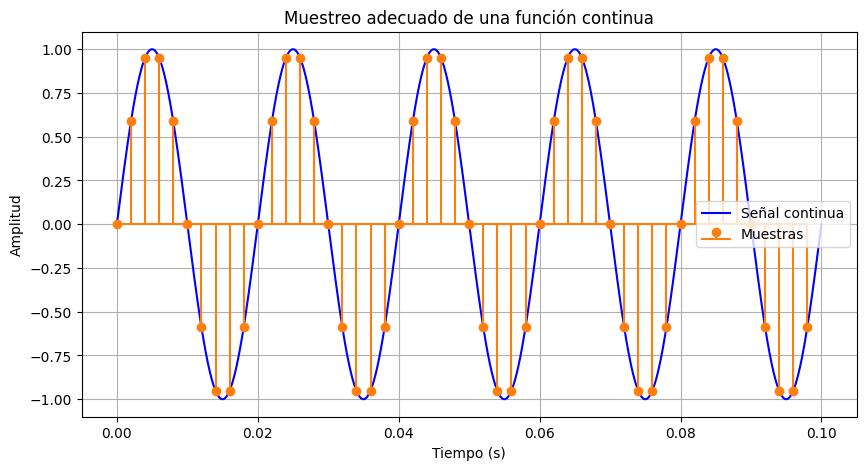

In [2]:
# Frecuencia de la señal
f = 50  # Hz

# Función continua
def f_continua(t):
    return np.sin(2 * np.pi * f * t)

# Tiempo para la "señal continua" (resolución alta para simular continuidad)
t_continua = np.linspace(0, 0.1, 10000)  # 0 a 0.1 segundos

# Evaluar la señal continua
senal_continua = f_continua(t_continua)

fs = 500  # Frecuencia de muestreo (Hz), muy por encima de Nyquist
t_muestras = np.arange(0, 0.1, 1/fs)  # Instantes de muestreo
senal_muestreada = f_continua(t_muestras)
plt.figure(figsize=(10, 5))
plt.plot(t_continua, senal_continua, label='Señal continua', color='blue')
plt.stem(t_muestras, senal_muestreada, linefmt='C1-', markerfmt='C1o', basefmt='C1-', label='Muestras')
plt.title('Muestreo adecuado de una función continua')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()
plt.show()

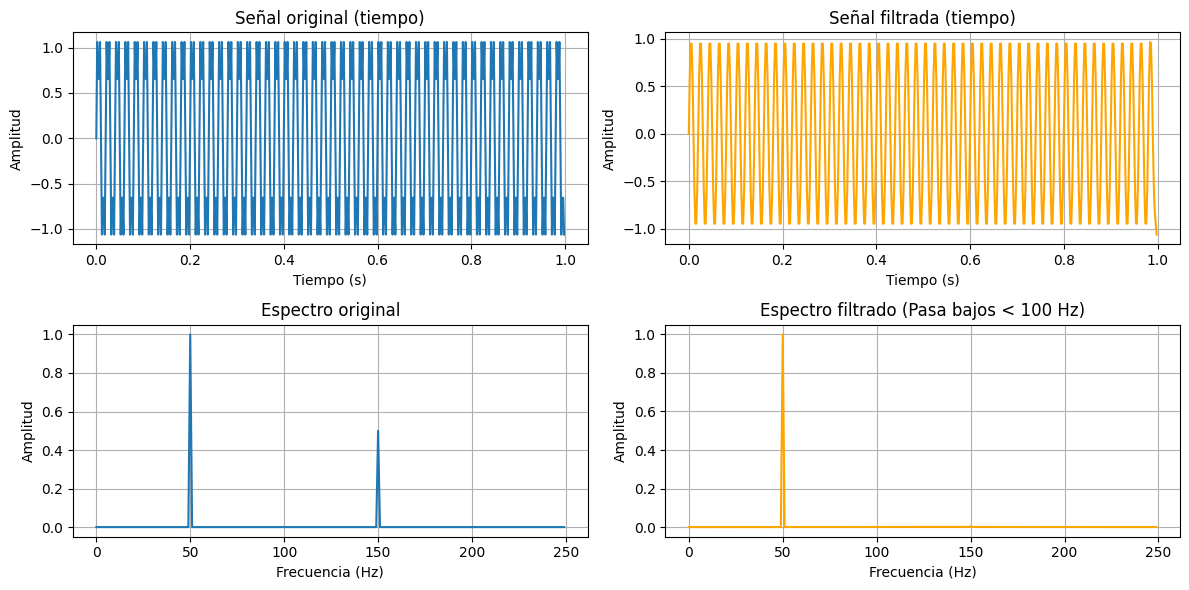

In [3]:
# Crear la señal compuesta ---
fs = 500  # Frecuencia de muestreo (Hz)
t = np.arange(0, 1, 1/fs)  # 1 segundo de señal

# Señal original: combinación de 50 Hz y 150 Hz
senal = np.sin(2*np.pi*50*t) + 0.5*np.sin(2*np.pi*150*t)

# Filtro pasa bajos (corte en 100 Hz) ---
cutoff = 100  # Frecuencia de corte (Hz)
b, a = butter(N=4, Wn=cutoff/(fs/2), btype='low')

# Aplicar el filtro sin desfase (zero-phase)
senal_filtrada = filtfilt(b, a, senal)

# Calcular FFTs
def calcular_fft(senal, fs):
    N = len(senal)
    yf = fft(senal)
    xf = fftfreq(N, 1/fs)[:N//2]
    amplitud = 2.0 / N * np.abs(yf[:N//2])
    return xf, amplitud

xf, amp_original = calcular_fft(senal, fs)
_, amp_filtrada = calcular_fft(senal_filtrada, fs)

# Graficar señales en el tiempo ---
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(t, senal, label='Original')
plt.title('Señal original (tiempo)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(t, senal_filtrada, label='Filtrada', color='orange')
plt.title('Señal filtrada (tiempo)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

# Graficar espectros ---
plt.subplot(2, 2, 3)
plt.plot(xf, amp_original, label='Original')
plt.title('Espectro original')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(xf, amp_filtrada, label='Filtrada', color='orange')
plt.title('Espectro filtrado (Pasa bajos < 100 Hz)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()

La frecuencia dominante es aproximadamente: 64.78 Hz


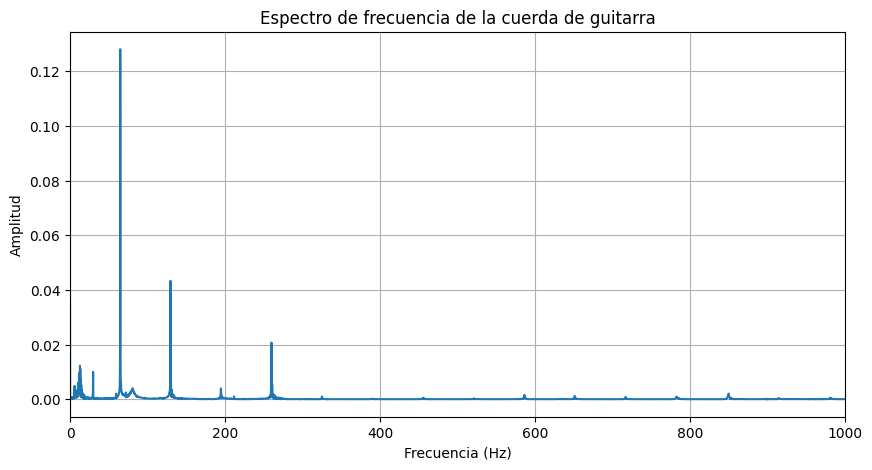

In [9]:
archivo_mp3 = 'Recursos/guitarra.mp3'  # Cambia esto
senal, fs = librosa.load(archivo_mp3, sr=None)

# Aplicar FFT
N = len(senal)
yf = fft(senal)
xf = fftfreq(N, 1/fs)[:N//2]
amplitud = 2.0 / N * np.abs(yf[:N//2])

# Buscar la frecuencia dominante
indice_max = np.argmax(amplitud)
f_dominante = xf[indice_max]
print(f"La frecuencia dominante es aproximadamente: {f_dominante:.2f} Hz")

# Graficar
plt.figure(figsize=(10, 5))
plt.plot(xf, amplitud)
plt.title('Espectro de frecuencia de la cuerda de guitarra')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.xlim(0, 1000)  # Las cuerdas de guitarra suelen estar debajo de 1000 Hz
plt.show()

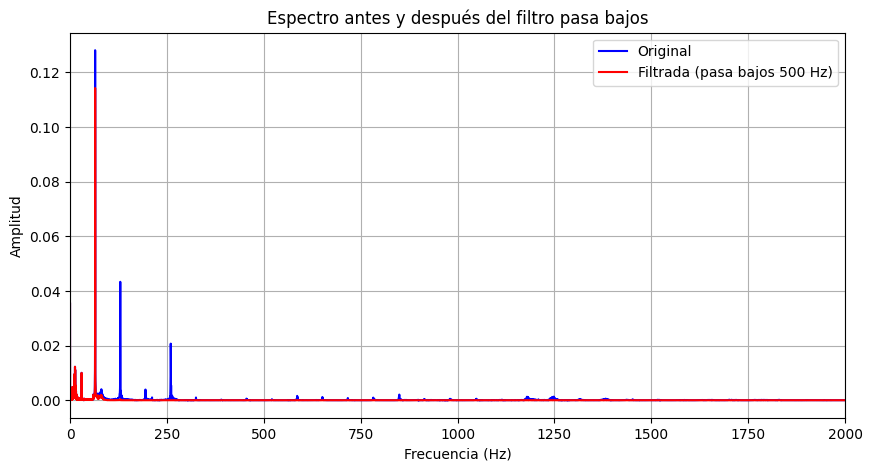

In [10]:
# --- Filtro pasa bajos (LPF) ---
# Diseñar un filtro Butterworth de orden 5 con frecuencia de corte 500 Hz
fc = 80  # Frecuencia de corte (Hz)
b, a = signal.butter(5, fc / (fs / 2), btype='low')  # Normalizamos la frecuencia

# Aplicar el filtro
senal_filtrada = signal.filtfilt(b, a, senal)

# --- FFT antes y después ---
def calcular_fft(senal, fs):
    N = len(senal)
    yf = fft(senal)
    xf = fftfreq(N, 1/fs)[:N//2]
    amplitud = 2.0 / N * np.abs(yf[:N//2])
    return xf, amplitud

xf, amplitud_original = calcular_fft(senal, fs)
_, amplitud_filtrada = calcular_fft(senal_filtrada, fs)

# Graficar
plt.figure(figsize=(10, 5))
plt.plot(xf, amplitud_original, label='Original', color='blue')
plt.plot(xf, amplitud_filtrada, label='Filtrada (pasa bajos 500 Hz)', color='red')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('Espectro antes y después del filtro pasa bajos')
plt.xlim(0, 2000)
plt.legend()
plt.grid(True)
plt.show()

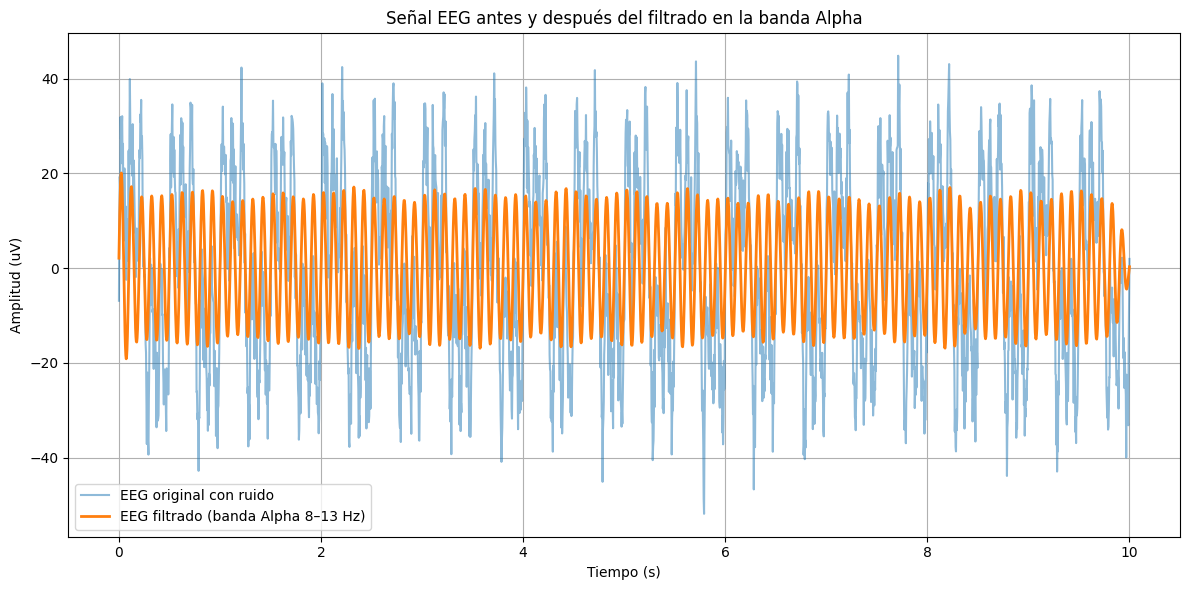

In [11]:
# Simulación de una señal EEG con componentes de varias bandas
fs = 250  # Frecuencia de muestreo típica para EEG (Hz)
t = np.linspace(0, 10, fs * 10)  # 10 segundos

# Componentes en diferentes bandas
delta = 20 * np.sin(2 * np.pi * 2 * t)       # 2 Hz (Delta)
theta = 10 * np.sin(2 * np.pi * 6 * t)       # 6 Hz (Theta)
alpha = 15 * np.sin(2 * np.pi * 10 * t)      # 10 Hz (Alpha)
beta = 5 * np.sin(2 * np.pi * 20 * t)        # 20 Hz (Beta)
gamma = 2 * np.sin(2 * np.pi * 40 * t)       # 40 Hz (Gamma)

# Señal EEG total + ruido
eeg = delta + theta + alpha + beta + gamma + 5 * np.random.randn(len(t))

# Diseñar filtro pasa banda para la banda Alpha (8–13 Hz)
lowcut = 8
highcut = 13
b, a = signal.butter(4, [lowcut / (fs / 2), highcut / (fs / 2)], btype='bandpass')

# Aplicar el filtro
eeg_alpha = signal.filtfilt(b, a, eeg)

# Graficar
plt.figure(figsize=(12, 6))

plt.plot(t, eeg, label='EEG original con ruido', alpha=0.5)
plt.plot(t, eeg_alpha, label='EEG filtrado (banda Alpha 8–13 Hz)', linewidth=2)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (uV)')
plt.title('Señal EEG antes y después del filtrado en la banda Alpha')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

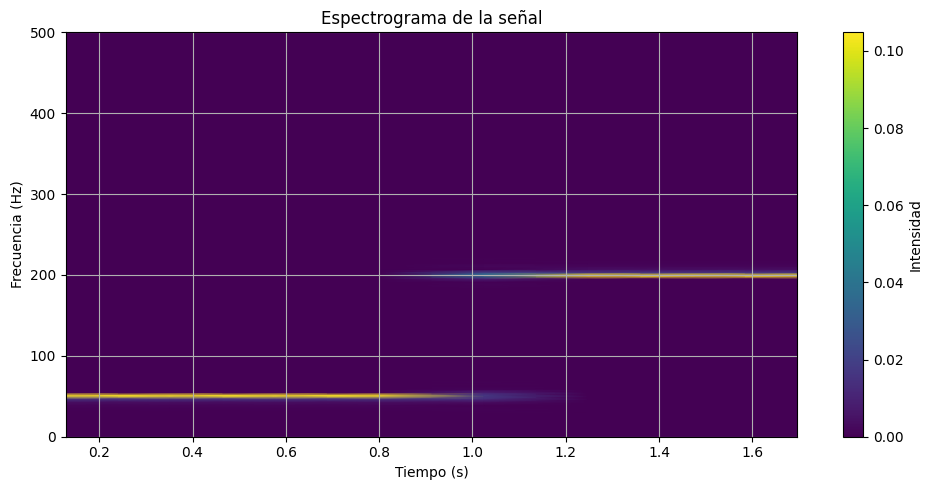

In [12]:
fs = 1000  # Frecuencia de muestreo (Hz)
t = np.linspace(0, 2, 2 * fs, endpoint=False)  # 2 segundos

# Crear una señal
# De 0 a 1 segundo: 50 Hz
# De 1 a 2 segundos: 200 Hz
senal = np.concatenate([
    np.sin(2 * np.pi * 50 * t[:fs]),    # 50 Hz
    np.sin(2 * np.pi * 200 * t[fs:])    # 200 Hz
])

# Calcular el espectrograma
f, t_spec, Sxx = spectrogram(senal, fs)

# Graficar el espectrograma
plt.figure(figsize=(10, 5))
plt.pcolormesh(t_spec, f, Sxx, shading='gouraud')
plt.colorbar(label='Intensidad')
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')
plt.title('Espectrograma de la señal')
plt.ylim(0, 500)  # Mostrar solo hasta 500 Hz
plt.grid(True)
plt.tight_layout()
plt.show()